In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

# Importing Qiskit

# Step 1: Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply quantum gates
qc.h(0)  # Apply Hadamard gate to the first qubit
qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

# Step 3: Measure the qubits
qc.measure([0, 1], [0, 1])

# Step 4: Visualize the circuit
print("Quantum Circuit:")
print(qc)

# Step 5: Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()

# Step 6: Get and visualize the results
counts = result.get_counts(qc)
print("\nMeasurement Results:")
print(counts)

# Plot the results
plot_histogram(counts)

ImportError: cannot import name 'Aer' from 'qiskit' (/home/neo/environments/qiskit_demo/venv/lib/python3.10/site-packages/qiskit/__init__.py)

In [4]:
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# Importing Qiskit

# Step 1: Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply quantum gates
qc.h(0)  # Apply Hadamard gate to the first qubit
qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

# Step 3: Measure the qubits
qc.measure([0, 1], [0, 1])

# Step 4: Visualize the circuit
print("Quantum Circuit:")
print(qc)

# Step 5: Simulate the circuit
simulator = AerSimulator()  # Use AerSimulator instead of Aer.get_backend()
result = execute(qc, simulator, shots=1024).result()

# Step 6: Get and visualize the results
counts = result.get_counts(qc)
print("\nMeasurement Results:")
print(counts)

# Plot the results
plot_histogram(counts)

ModuleNotFoundError: No module named 'qiskit.providers.aer'

In [6]:
qiskit.__qiskit_version__

NameError: name 'qiskit' is not defined

In [7]:
import qiskit

In [9]:
qiskit.__version__

'1.4.2'

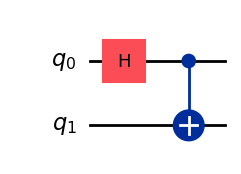

In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [12]:
# from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer
# from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer
from qiskit.execute_function import execute
import Our_Qiskit_Functions as oq
import numpy as np
import math as m
S_simulator = Aer.backends(name='statevector_simulator' ) [0]
M_simulator = Aer.backends(name='qasm_simulator' ) [0]

ImportError: cannot import name 'Aer' from 'qiskit' (/home/neo/environments/qiskit_demo/venv/lib/python3.10/site-packages/qiskit/__init__.py)

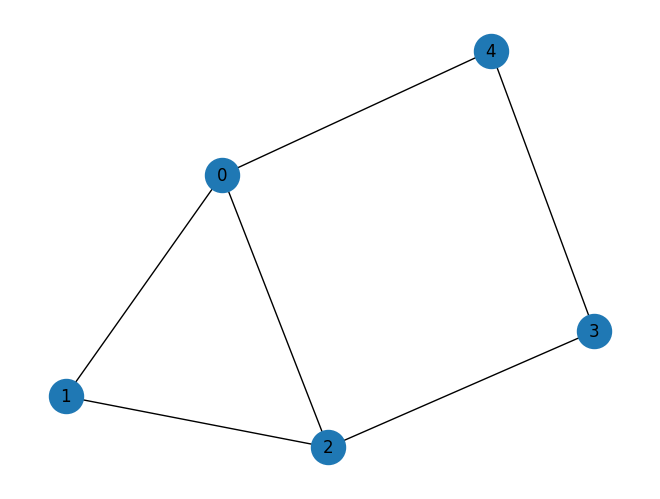

In [13]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

n = 5

graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)

In [14]:
from qiskit.quantum_info import SparsePauliOp
def build_max_cut_paulis(graph: rx.PyGraph) -> list[tuple[str, float]]:
    """Convert the graph to Pauli list.

    This function does the inverse of `build_max_cut_graph`
    """
    pauli_list = []
    for edge in list(graph.edge_list()):
        paulis = ["I"] * len(graph)
        paulis[edge[0]], paulis[edge[1]] = "Z", "Z"

        weight = graph.get_edge_data(edge[0], edge[1])

        pauli_list.append(("".join(paulis)[::-1], weight))

    return pauli_list


max_cut_paulis = build_max_cut_paulis(graph)

cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)
print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIIZZ', 'IIZIZ', 'ZIIIZ', 'IIZZI', 'IZZII', 'ZZIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


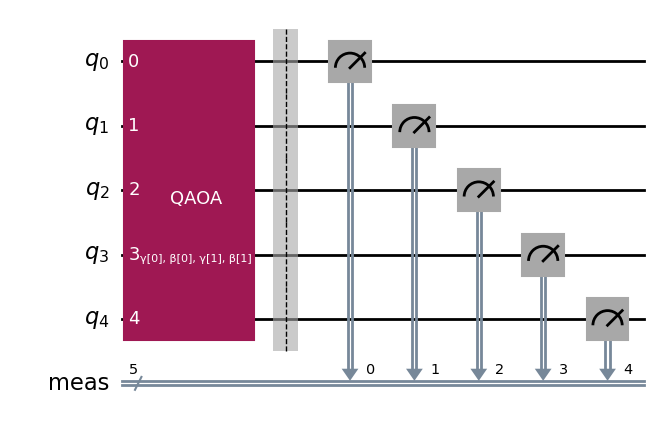

In [15]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

circuit.draw('mpl')

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy(min_num_qubits=127)
print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)

candidate_circuit = pm.run(circuit)
candidate_circuit.draw('mpl', fold=False, idle_wires=False)

AccountNotFoundError: 'Unable to find account.'